# Finding the Scaling Relations 

* This repository consists of two main routines. All the expressions are symbolically evaluated in the [model_generator.py](https://github.com/Rnazx/Scaling-Relations/blob/master/model_generator.py) file using the model_gen function. This function takes in the model number and other regimes described in the manuscript. This function is then used in the [jupyter notebook file](scaling_relations.ipynb) to find the  expression per the chosen regime. 

* We have seven different regimes as described in the manuscript. (describe all the regimes?)
The model number and the letter are automatically chosen from the selection in the widgets. The following are the steps needed to find the scaling relations. The instructions below are given in the order of the blocks of code in the [jupyter notebook file](scaling_relations.ipynb).


### Import dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from fractions import Fraction
from ipywidgets import interact, interactive

### Define Symbols involved
We need these symbols to substitute the physical constants' values into the final expressions.

In [2]:
q = Symbol('q')
omega = Symbol('\Omega')
sigma = Symbol('\Sigma')
sigmatot = Symbol('Sigma_tot')
sigmasfr = Symbol('Sigma_SFR')
T = Symbol('T')


# Defining the Constants
calpha = Symbol('C_alpha')
gamma = Symbol('gamma')
boltz = Symbol('k_B')
mu = Symbol('mu')
mu0 = Symbol('Mu_0')
mh = Symbol('m_H')
G = Symbol('G')
xio = Symbol('xi_0')
delta = Symbol('\delta')
mstar = Symbol('m_*')
cl = Symbol('C_l')
kappa = Symbol('kappa')
mach = Symbol('M')
E51 = Symbol('E_51')
Rk = Symbol('R_k')
psi = Symbol('psi')
kalpha = Symbol('K_alpha')
bet = Symbol('beta')
alphak = Symbol('alpha_k')
Gamma = Symbol('Gamma')
eta = Symbol('eta')
Nsb = Symbol('N_sb')

### Constants involved

In [3]:
g_Msun = 1.989e33  # solar mass in g
cgs_G = 6.674e-8  # gravitational constant in cgs units
g_mH = 1.6736e-24  # mass of hydrogen atom in grams
cgs_kB = 1.3807e-16  # boltzmann constant in cgs units

# Reading the Constant values
gval, clval, xioval, mstarval, deltaval, e51val, kaval, Gammaval, Caval, Rkval, muval, mu0val, g_Msun, cgs_G, g_mH, cgs_kB = tuple(
    np.genfromtxt('constants.in', delimiter='=', dtype=np.float64)[:, -1])

# List of tuples for substituting the values in the symbol. 
# The firt element of each tuple is the symbol for which the value needs to be substituted
# The second element is the numerical value which is stored in constants.in file
const = [(boltz, cgs_kB), (mh, g_mH), (G, cgs_G), (gamma, gval),
         (calpha, Caval), (Rk, Rkval), (mu, muval), (cl,
                                               clval), (xio, xioval), (mstar, mstarval*g_Msun),
         (delta, deltaval), (E51, e51val), (kalpha, kaval), (Gamma, Gammaval), (mu0, mu0val), (eta, 0.1), (Nsb, 1)]

### Choose the model

In [4]:
def myf(h, l, u, t, alpha):
    return h, l, u, t, alpha


y = interactive(myf, h=[r'subsonic', r'supersonic', r'cs/omega'],
                l=[r'maximum scale driven', r'supernovae driven', r'superbubble driven'],
                u=[r'sound speed', r'supenovae/superbubble driven'],
                t=[r'eddy turnover time', r'supernovae/superbubble renovation time'],
                alpha=['regime 1', 'regime 2', 'regime 3'])#regime
y

interactive(children=(Dropdown(description='h', options=('subsonic', 'supersonic', 'cs/omega'), value='subsoni…

In [7]:
hreg, lreg, ureg, taureg, alphareg = y.result
lreg

'superbubble driven'

In [8]:
# conversion factors
pc_kpc = 1e3  # number of pc in one kpc
cm_kpc = 3.086e+21  # number of centimeters in one parsec
cm_km = 1e5  # number of cm in one km
s_Myr = 1e+6*(365*24*60*60)  # number of seconds in one megayear

from model_generator import model_gen, model_gen_regime
#quantities = model_gen(model_no, let, not_ren)
quantities = model_gen_regime(hreg, lreg, ureg, taureg, alphareg='regime 1')

### Converting the regimes to model number and letter according to the paper

In [9]:

let = 'a'
not_ren = True
if lreg == 'maximum scale driven':
    if ureg == 'sound speed':
        model_no = 1
    else:
        model_no = 2
elif ureg != 'sound speed':
    if hreg == 'cs/omega':
        model_no = 4
    else:
        model_no = 3
else:
    print('Supernovae correlation length cannot have sound speed as the correlation velocity')

try:
    if model_no != 1:
        if hreg == 'subsonic':
            let = 'a'
        elif hreg == 'supersonic':
            let = 'b'
    else:
        print('Subsonic or supersonic regime not applicable for this model.')
    if [3, 4].count(model_no) > 0:
        if taureg == 'eddy turnover time':
            not_ren = True
        else:
            not_ren = False
            if let == 'a': let = 'c'
            else : let = 'd'
    else:
        print('Supernova renovation time not applicable for this model')
except NameError:
    print('******************************************************************************')
    print('Change the model combination')
    print('******************************************************************************')


### Displaying the model number and letter

In [10]:
model_no, let

(3, 'd')

 Use [python file](model_generator.py)

### Quantity for which the scaling relations are required

In [11]:
def myfunc(quantity):
    return quantity

quantity_string = ['h', 'l', 'u', 'tau',
                   'biso', 'bani', 'Bbar', 'tanpB', 'tanpb']
quan_interact = interactive(myfunc, quantity=quantity_string)
quan_interact

interactive(children=(Dropdown(description='quantity', options=('h', 'l', 'u', 'tau', 'biso', 'bani', 'Bbar', …

In [12]:
idx = quantity_string.index(quan_interact.result)
quantities[idx]

2.03743352495916e-79*pi**0.214285714285714*xi_0**0.5*sqrt(T**2*\Omega*\Sigma**2*gamma**2*k_B**2*m_**q/(E_51*N_sb*Sigma_SFR*\delta*eta*m_H**3*mu**3*((C_l*E_51**(4/3)*N_sb**(4/3)*Sigma_SFR*\delta*eta**(4/3)*m_H*mu*(Gamma - 1)/(Gamma*\Sigma*m_**(\Sigma/(m_H*mu))**(1/3)*(T*gamma*k_B/(m_H*mu))**(1/3)))**(2/3)/(G*Sigma_tot))**1.28571428571429))

In [13]:
final_quantity = quantities[idx]
variables = [(sigmatot, 1), (sigma, 1), (sigmasfr, 1),
             (omega, 1), (q, 1), (T, 1)]
obs = sigma
variables.remove((obs, 1))
(diff(log(final_quantity.subs(const+variables)),obs)*obs).subs(obs,1)

1.57142857142857

### Find and plot the scaling relations

The scaling relation is 


Sigma_tot**0.64*T**1.14*\Omega**0.5*\Sigma**1.57*q**0.5/Sigma_SFR**0.93

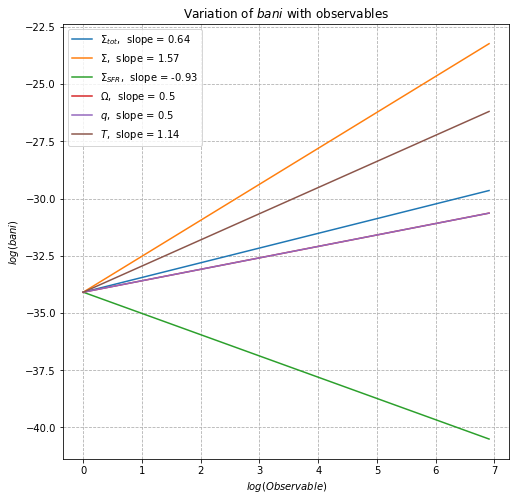

In [14]:
s = quantity_string[idx]
variables = [(sigmatot, 1), (sigma, 1), (sigmasfr, 1),
             (omega, 1), (q, 1), (T, 1)]
# quantity to be plotted
final_quantity = quantities[idx]
# observable to be varied
observ = [variables[i][0] for i in range(len(variables))]
var = np.linspace(1, 1000, 5000)
# plotting the scaling relations
plt.figure(figsize=(8, 8))
power = []
for obs in observ:
    variables = [(sigmatot, 1), (sigma, 1), (sigmasfr, 1),
                 (omega, 1), (q, 1), (T, 1)]
    variables.remove((obs, 1))
    final = const + variables
    z = final_quantity.subs(final)
    zf = [z.evalf(subs={obs: i}) for i in var]
    zf = np.array(np.float64(zf))
    if idx == 7:
        zf = -zf
    po = str(np.round(np.float64((diff(log(z), obs)*obs).subs(obs, 1)), 2))
    power.append(float(po))
    plt.plot(np.log(var), np.log(zf), label='$' +
             str(latex(obs))+'$,  slope = '+po)
plt.title('Variation of $'+s+'$ with observables')
plt.xlabel('$log(Observable)$')
plt.ylabel('$log('+s+')$')
plt.grid(True, which="both", ls="--")
plt.legend()

scaling = np.power(observ, power)
relation = 1
for i in scaling:
    relation *= i

print('The scaling relation is ')
relation
# plt.savefig('scal'+s+str(model_no)+let+'.png')

In [13]:
import ipywidgets as widgets
from IPython.display import display

# Define the available options for the dropdown menus
options_menu1 = ['Option A', 'Option B', 'Option C']
options_menu2 = {'Option A': ['Option 1', 'Option 2'],
                 'Option B': ['Option 2', 'Option 3'],
                 'Option C': ['Option 1', 'Option 3']}
options_menu3 = {'Option A': ['Choice X'],
                 'Option B': ['Choice Y'],
                 'Option C': ['Choice Z']}

# Create the dropdown widget for menu 1
dropdown_menu1 = widgets.Dropdown(options=options_menu1, description='Menu 1:')

# Create the dropdown widgets for menu 2 and menu 3, initially empty
dropdown_menu2 = widgets.Dropdown(description='Menu 2:')
dropdown_menu3 = widgets.Dropdown(description='Menu 3:')

# Create a Label widget for the message
message_label = widgets.Label(value='This is a message displayed at the bottom.')

# Variables to store selected options
selected_option1 = None
selected_option2 = None
selected_option3 = None

# Function to update the options in other menus based on the selected value
def update_options(change):
    global selected_option1, selected_option2, selected_option3

    if change['name'] == 'value' and change['new'] is not None:
        selected_option = change['new']

        # Update options for menu 2 based on menu 1 selection
        dropdown_menu2.options = options_menu2[selected_option]

        # Update options for menu 3 based on menu 1 selection
        dropdown_menu3.options = options_menu3[selected_option]

        # Check if "Option A" is selected to display or hide the message
        if selected_option == 'Option A':
            message_label.layout.visibility = 'visible'
        else:
            message_label.layout.visibility = 'hidden'

        # Update selected option variables
        selected_option1 = selected_option
        selected_option2 = None  # Reset to None when the first dropdown changes
        selected_option3 = None  # Reset to None when the first dropdown changes

# Observe changes in the dropdown_menu1 and call the update_options function
dropdown_menu1.observe(update_options)

# Observe changes in the other dropdown menus and update the selected_option variables
# def update_selected_option2(change):
#     global selected_option2
#     if change['name'] == 'value' and change['new'] is not None:
#         selected_option2 = change['new']

# def update_selected_option3(change):
#     global selected_option3
#     if change['name'] == 'value' and change['new'] is not None:
#         selected_option3 = change['new']

# dropdown_menu2.observe(update_selected_option2)
# dropdown_menu3.observe(update_selected_option3)

# Create an HBox container to hold the dropdown menus side by side
dropdowns_hbox = widgets.HBox([dropdown_menu1, dropdown_menu2, dropdown_menu3])

# Display the widgets
display(dropdowns_hbox, message_label)



Label(value='This is a message displayed at the bottom.')

In [14]:
def myf(h, l, u, t, alpha):
    return h, l, u, t, alpha


y = interactive(myf, h=[r'subsonic', r'supersonic', r'cs/omega'],
                l=[r'maximum scale driven', r'supernovae driven'],
                u=[r'sound speed', r'supenovae driven'],
                t=[r'eddy turnover time', r'supernovae renovation time'],
                alpha=['regime 1', 'regime 2', 'regime 3'])#regime
y

interactive(children=(Dropdown(description='h', options=('subsonic', 'supersonic', 'cs/omega'), value='subsoni…

In [15]:
import ipywidgets as widgets
from IPython.display import display

# Define the available options for the dropdown menus
options_l = [r'maximum scale driven', r'supernovae driven']
options_u = [r'sound speed', r'supenovae driven']
options_h= {r'sound speed': [r'subsonic', r'supersonic',],
                 r'supernovae driven': [r'supersonic', r'cs/omega']}
# options_menu3 = {'Option A': ['Choice X'],
#                  'Option B': ['Choice Y'],
#                  'Option C': ['Choice Z']}

# Create the dropdown widget for menu 1
dropdown_menu1 = widgets.Dropdown(options=options_l, description='Regime for l:')

# Create the dropdown widgets for menu 2 and menu 3, initially empty
dropdown_menu2 = widgets.Dropdown(options=options_u, description='Regime for u:')
dropdown_menu3 = widgets.Dropdown(description='Menu 3:')

# Create a Label widget for the message
message_label = widgets.Label(value='This is a message displayed at the bottom.')

# Variables to store selected options
selected_option1 = None
selected_option2 = None
selected_option3 = None

# Function to update the options in other menus based on the selected value
def update_options(change):
    global selected_option1, selected_option2, selected_option3

    if change['name'] == 'value' and change['new'] is not None:
        selected_option = change['new']

        # Update options for menu 2 based on menu 1 selection
        #dropdown_menu2.options = options_menu2[selected_option]

        # Update options for menu 3 based on menu 1 selection
        

        # Check if "Option A" is selected to display or hide the message
        if selected_option == 'Option A':
            message_label.layout.visibility = 'visible'
        else:
            message_label.layout.visibility = 'hidden'

        # Update selected option variables
        selected_option1 = selected_option #selected_option
        selected_option2 = None  # Reset to None when the first dropdown changes
        selected_option3 = None  # Reset to None when the first dropdown changes

# Observe changes in the dropdown_menu1 and call the update_options function
dropdown_menu1.observe(update_options)

# Observe changes in the other dropdown menus and update the selected_option variables
def update_selected_option2(change):
    global selected_option2
    if change['name'] == 'value' and change['new'] is not None:
        selected_option = change['new']
        #print(selected_option)
        dropdown_menu3.options = options_h[selected_option]
        # Update selected option variables
        selected_option1 = selected_option1 #selected_option
        selected_option2 = selected_option  # Reset to None when the first dropdown changes
        selected_option3 = None  # Reset to None when the first dropdown changes
        

 

# def update_selected_option3(change):
#     global selected_option3
#     if change['name'] == 'value' and change['new'] is not None:
#         selected_option3 = change['new']

dropdown_menu2.observe(update_selected_option2)
#dropdown_menu3.observe(update_selected_option3)

# Create an HBox container to hold the dropdown menus side by side
dropdowns_hbox = widgets.HBox([dropdown_menu1, dropdown_menu2, dropdown_menu3])
#dropdowns_vbox = widgets.HBox([dropdown_menu1, dropdown_menu2, dropdown_menu3])

# Display the widgets
display(dropdowns_hbox, message_label)
#display(dropdowns_vbox, message_label)



Label(value='This is a message displayed at the bottom.')

In [16]:
import ipywidgets as widgets
from IPython.display import display, clear_output, Latex

output = widgets.Output()

quantity_buttons = [widgets.Button(description=f"{quants}") for quants in ['h', 'l', 'u', 'tau',
                   'biso', 'bani', 'Bbar', 'tanpB', 'tanpb']]
def button_clicked(model_number):
    with output:
        clear_output(wait=True)
        print(f"                                               Model {model_number} is selected!")
        print("                           Select the Quatity for which the scaling relation needs to be found")
        model_no = int(model_number[0])
        let = model_number[1]
        box_row4 = widgets.HBox(quantity_buttons, layout=widgets.Layout(justify_content='center'))
        display(box_row4)
        if model_no == 1:
            quantities = model_gen(model_no) 
        else:
            quantities = model_gen(model_no, let)
        print(quantities[0])
        
    def quant_button(quantity_name):
        with output:
            print(f"Quantity {quantity_name} is selected!")

    for button in quantity_buttons:
        button.on_click(lambda event, button=button: quant_button(str(button.description.split()[-1])))


        

# Create the buttons
buttons_row1 = [widgets.Button(description=f"Model {model_number}") for model_number in range(1, 2)]
buttons_row2 = [widgets.Button(description=f"Model {model_number}") for model_number in ['2a', '2b']]
buttons_row3 = [widgets.Button(description=f"Model {model_number}") for model_number in ['3a', '3b', '3c', '3d']]

# Set the click event for each button
for button in buttons_row1 + buttons_row2 + buttons_row3:
    button.on_click(lambda event, button=button: button_clicked(str(button.description.split()[-1])))

# Create widget containers for the buttons and center align them
box_row1 = widgets.HBox(buttons_row1, layout=widgets.Layout(justify_content='center'))
box_row2 = widgets.HBox(buttons_row2, layout=widgets.Layout(justify_content='center'))
box_row3 = widgets.HBox(buttons_row3, layout=widgets.Layout(justify_content='center'))

# Display the buttons
display(box_row1, box_row2, box_row3, output)


Output()